In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [2]:
#dataset = pd.read_csv('parkinsons.data')
dataset = pd.read_csv("parkinsons.data", sep=',', index_col='name')

In [3]:
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
dataset.shape

(195, 23)

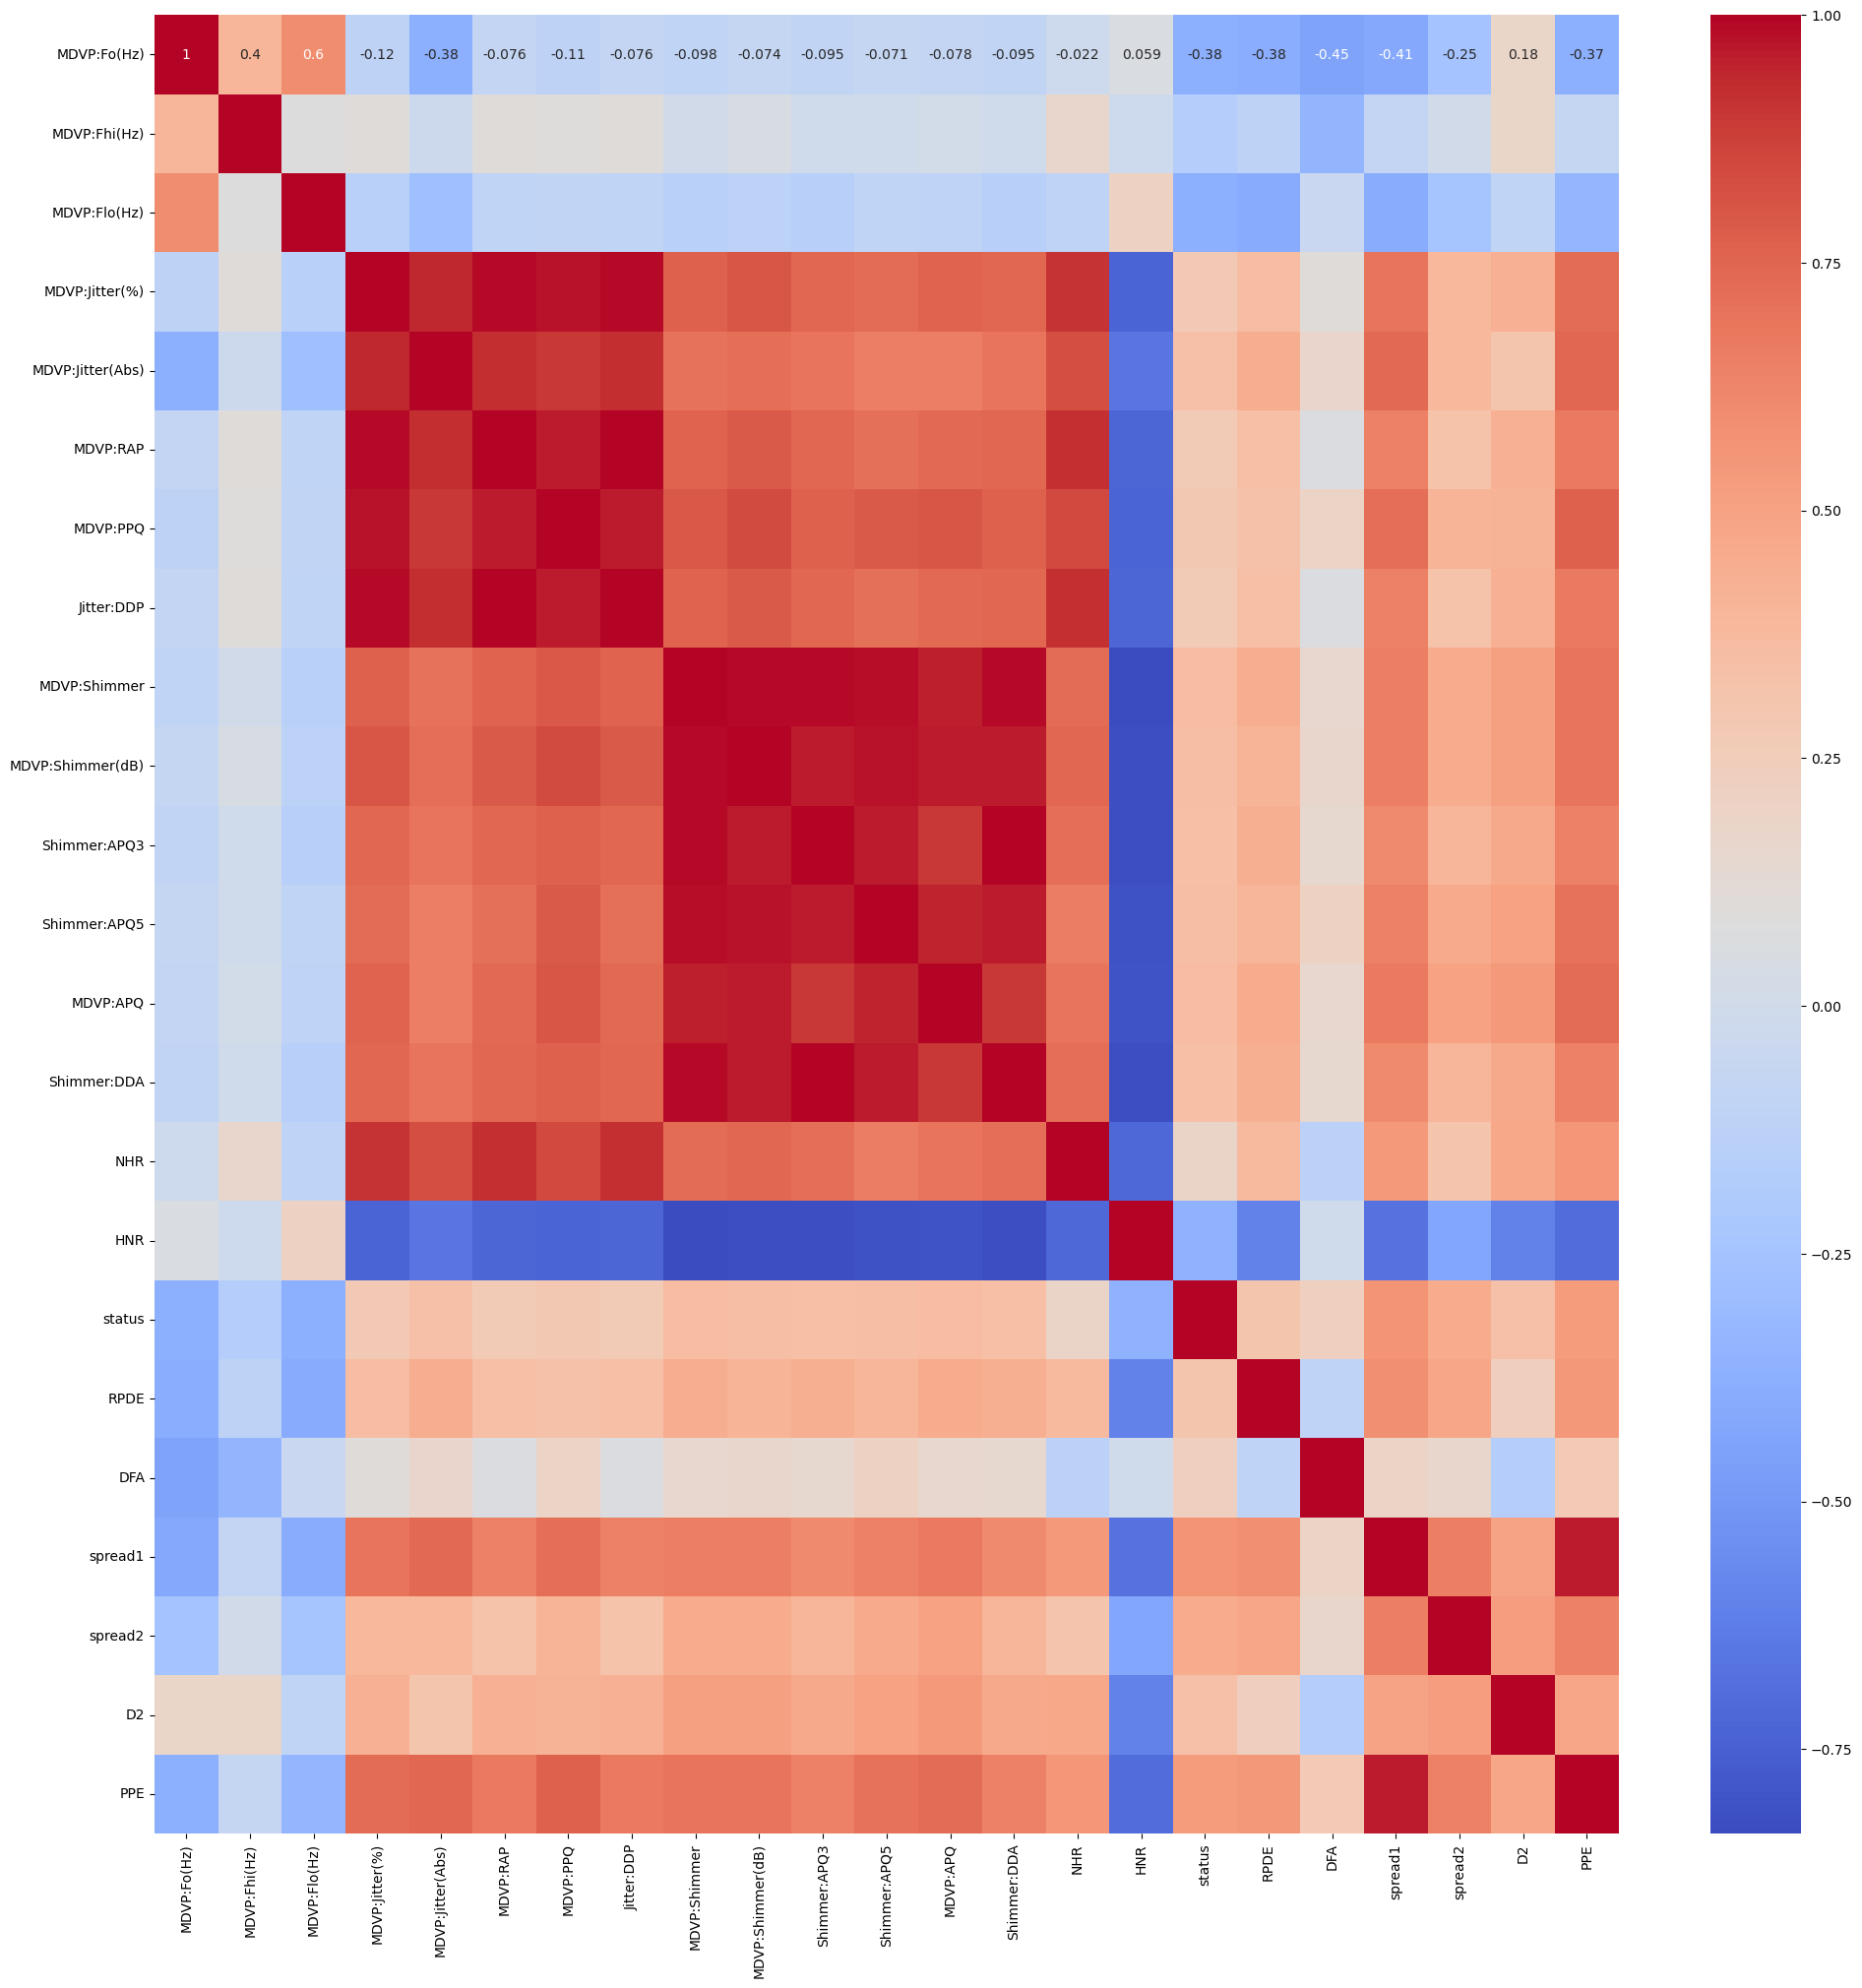

In [5]:
# Correlation matrix
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [6]:
x = dataset.iloc[: , np.r_[0:16, 17:23]].values
y = dataset.iloc[: , 16].values

In [7]:
print(x)
dataset.shape

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


(195, 23)

In [8]:
x.shape

(195, 22)

In [9]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [10]:
x.shape[1]

22

# splitting dataset

In [11]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
# x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

In [12]:
print(y_train)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1]


In [13]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(x_train)

[[1.582190e+02 4.425570e+02 7.194800e+01 ... 2.732800e-01 2.640798e+00
  1.701060e-01]
 [1.521250e+02 1.614690e+02 7.659600e+01 ... 1.735200e-01 2.080121e+00
  1.608090e-01]
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 ...
 [1.768240e+02 2.152930e+02 8.396100e+01 ... 2.816180e-01 2.655744e+00
  2.348090e-01]
 [1.761700e+02 1.856040e+02 1.635640e+02 ... 1.963710e-01 2.536527e+00
  1.732180e-01]
 [1.840550e+02 1.965370e+02 1.669770e+02 ... 6.341200e-02 2.361532e+00
  1.157300e-01]]


In [14]:
sc = StandardScaler()
# x_train[:,195:] = sc.fit_transform(x_train[:,195:])
# x_test[:,195:] = sc.transform(x_test[:,195:])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[ 0.04310816,  2.58750502, -1.02894433, ...,  0.50657055,
         0.62029563, -0.42911009],
       [-0.10416436, -0.40945256, -0.92324764, ..., -0.63475461,
        -0.79394444, -0.53001778],
       [ 0.4411113 ,  0.42789753, -0.97575488, ..., -0.80713177,
         0.71860284, -0.84565685],
       ...,
       [ 0.4927316 ,  0.16441842, -0.75576569, ...,  0.60196319,
         0.65799511,  0.27316269],
       [ 0.4769265 , -0.15212542,  1.05442653, ..., -0.37332296,
         0.35728462, -0.39533309],
       [ 0.66748177, -0.03555787,  1.13203901, ..., -1.89446822,
        -0.08411915, -1.01929578]])

In [16]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

# Logistic Regression

In [17]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [18]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(lr_classifier.predict(test_value))

[1]


In [19]:
y_pred = lr_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


0.7948717948717948


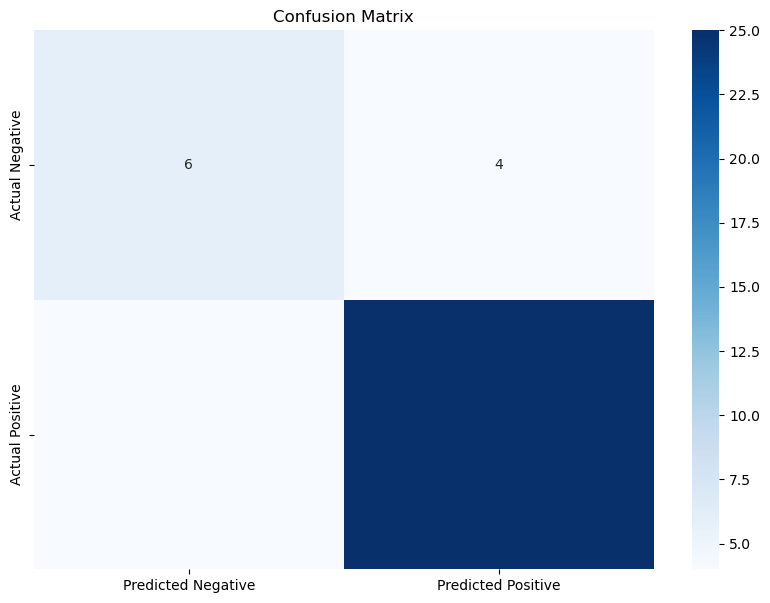

In [20]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [21]:
import pickle

LR_model_filename = "LR_model.pkl"

with open(LR_model_filename,"wb") as file:
  pickle.dump(lr_classifier,file)

In [22]:
with open(LR_model_filename,"rb") as file:
  Pickle_LR_model = pickle.load(file)

In [23]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(Pickle_LR_model.predict(test_value))

[1]


# KNN

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNN_model_filename = "KNN_model.pkl"

with open(KNN_model_filename,"wb") as file:
  pickle.dump(knn_classifier,file)

In [25]:
y_pred = knn_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


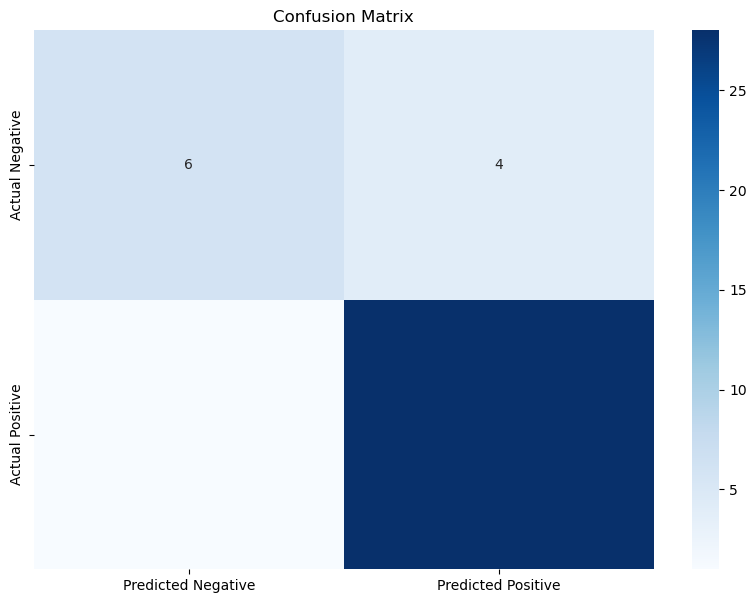

In [26]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# SVM

In [27]:
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVM_model_filename = "SVM_model.pkl"

with open(SVM_model_filename,"wb") as file:
  pickle.dump(svm_classifier,file)

In [28]:
y_pred = svm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8205128205128205


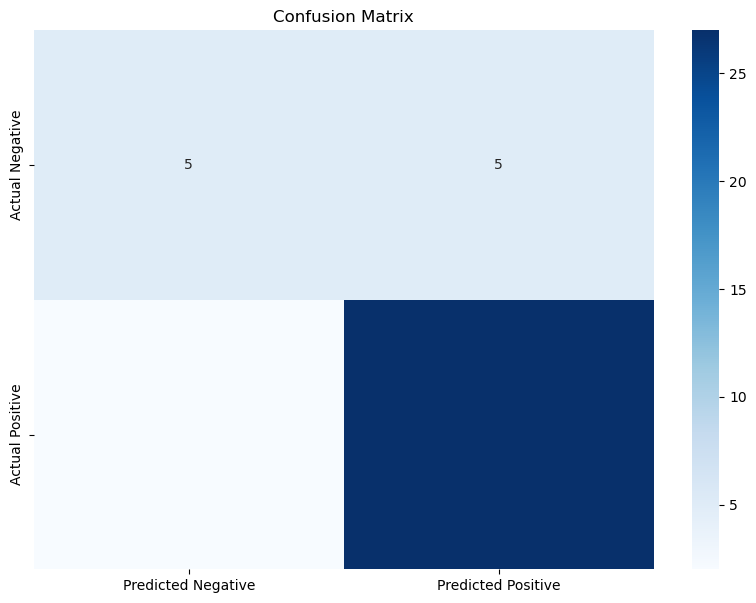

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Decision Tree

# Decison Tree

In [30]:
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt_classifier.fit(x_train, y_train)

dt_model_filename = "DT_model.pkl"

with open(dt_model_filename,"wb") as file:
  pickle.dump(dt_classifier,file)

In [31]:
y_pred = dt_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


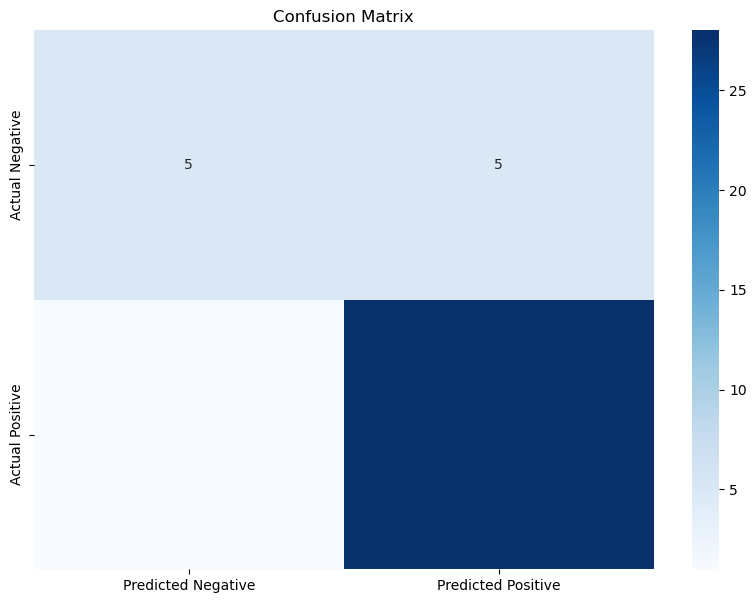

In [32]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Bagging

In [33]:
dt_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(estimator = dt_classifier , n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(x_train,y_train)

bc_model_filename = "BC_model.pkl"

with open(bc_model_filename,"wb") as file:
  pickle.dump(bc_classifier,file)

In [34]:
y_pred = bc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


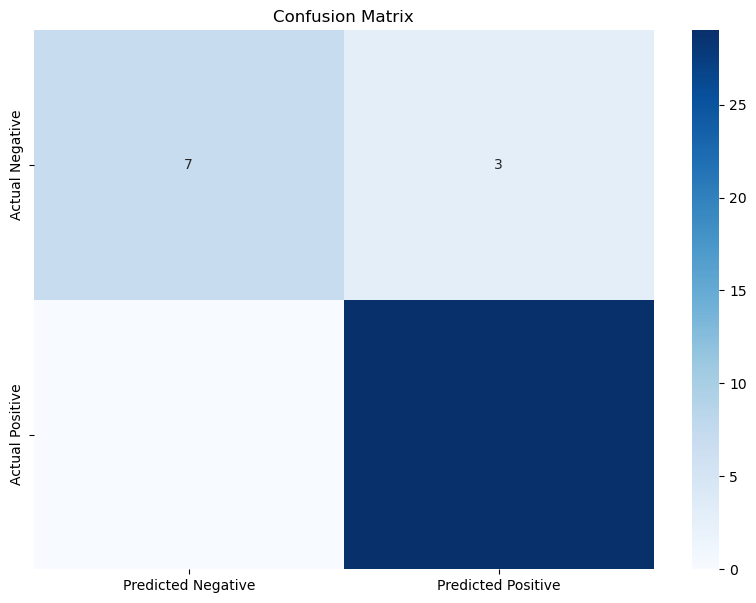

In [35]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [70]:
col = list(dataset.columns)
col.remove('status')
print(col)


['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


0.8974358974358975


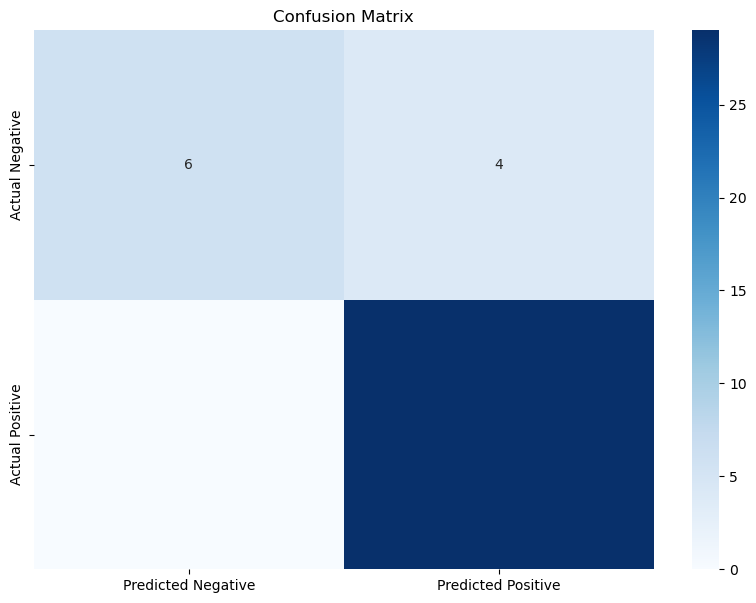

In [71]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Ada Boost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(x_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

C:\Users\ANESH VEMA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [73]:
y_pred = abc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.7435897435897436


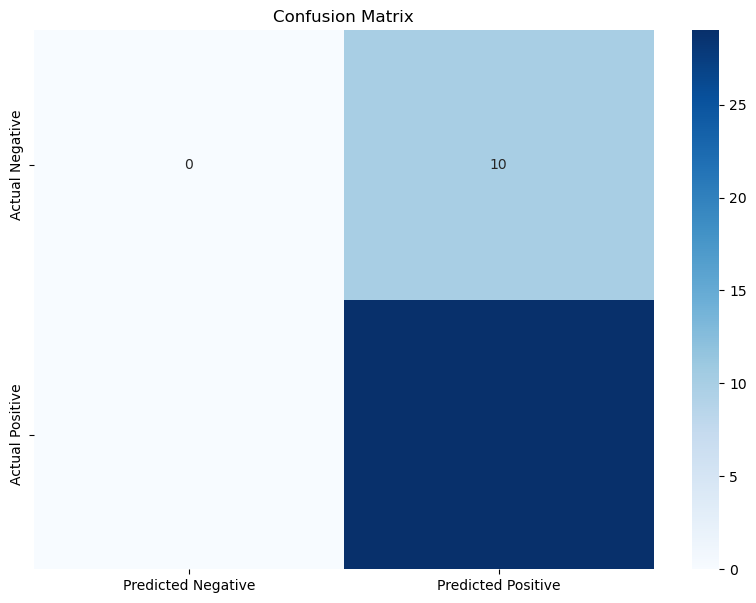

In [74]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

ANN


# ANN

In [75]:
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical


n_cols = x_train.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(n_cols,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(2,activation = 'sigmoid'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, to_categorical(y_train), epochs=20)


Epoch 1/20
5/5 [==============================] - 2s 4ms/step - loss: 4.4623 - accuracy: 0.5513
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 2.1436 - accuracy: 0.6538
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 1.5788 - accuracy: 0.5833
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 1.2564 - accuracy: 0.5705
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.9899 - accuracy: 0.7179
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.8085 - accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8344 - accuracy: 0.5769
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.7628
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.5343 - accuracy: 0.7308
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.7821
Epoch 11/20
5/5 [======================

In [76]:
np.set_printoptions(precision=4, suppress=True)
y_pred = model.predict(x_test)
y_pred

#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 3ms/step


array([[0.4695, 0.4473],
       [0.5364, 0.4343],
       [0.5188, 0.3545],
       [0.4808, 0.4533],
       [0.5065, 0.4292],
       [0.4958, 0.4356],
       [0.5685, 0.2196],
       [0.4705, 0.4089],
       [0.6045, 0.2575],
       [0.5325, 0.5004],
       [0.4267, 0.5426],
       [0.4542, 0.3942],
       [0.4759, 0.4533],
       [0.5999, 0.2768],
       [0.4228, 0.4436],
       [0.6027, 0.3133],
       [0.551 , 0.2561],
       [0.5696, 0.3175],
       [0.5724, 0.4223],
       [0.5214, 0.461 ],
       [0.568 , 0.3519],
       [0.5352, 0.4288],
       [0.5036, 0.5259],
       [0.3259, 0.4689],
       [0.4622, 0.4649],
       [0.4856, 0.411 ],
       [0.1218, 0.3509],
       [0.469 , 0.461 ],
       [0.4595, 0.4216],
       [0.4533, 0.5292],
       [0.4541, 0.4009],
       [0.4806, 0.4361],
       [0.6526, 0.2535],
       [0.5507, 0.3323],
       [0.4335, 0.4607],
       [0.4154, 0.606 ],
       [0.4863, 0.4175],
       [0.4539, 0.5313],
       [0.5726, 0.21  ]], dtype=float32)

In [77]:
y_pred_bin = []
for i in range(len(y_pred)):
   print(i)

   if(y_pred[i][0] > y_pred[i][1]):
      print("healthy")
      y_pred_bin.append(0)
   else:
      print("parkinson")
      y_pred_bin.append(1)

#print(y_pred[0][1])
# y_pred_bin[0] = 1
print(np.concatenate((np.array(y_pred_bin).reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#y_pred_bin



0
healthy
1
healthy
2
healthy
3
healthy
4
healthy
5
healthy
6
healthy
7
healthy
8
healthy
9
healthy
10
parkinson
11
healthy
12
healthy
13
healthy
14
parkinson
15
healthy
16
healthy
17
healthy
18
healthy
19
healthy
20
healthy
21
healthy
22
parkinson
23
parkinson
24
parkinson
25
healthy
26
parkinson
27
healthy
28
healthy
29
parkinson
30
healthy
31
healthy
32
healthy
33
healthy
34
parkinson
35
parkinson
36
healthy
37
parkinson
38
healthy
[[0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]]


0.5128205128205128


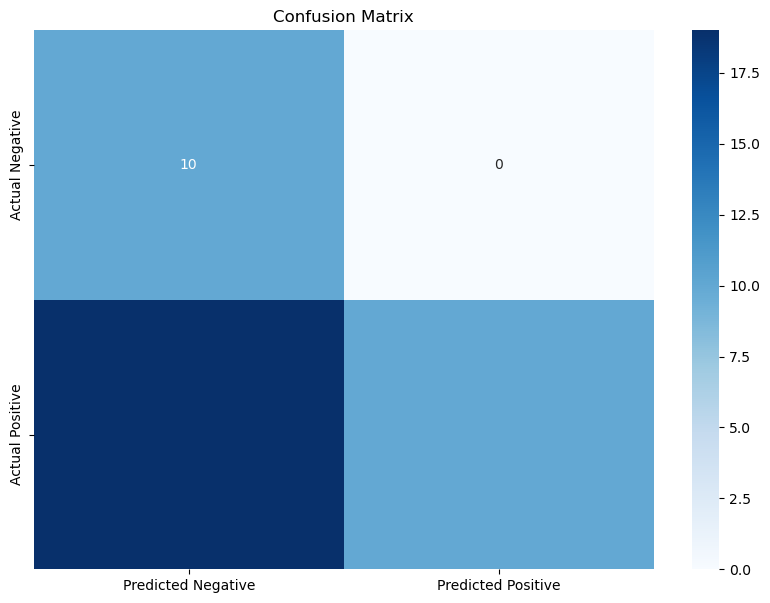

In [78]:
cm = confusion_matrix(y_test,y_pred_bin)
print(accuracy_score(y_test, y_pred_bin))
cm_displayer(cm)

# Ann Graph

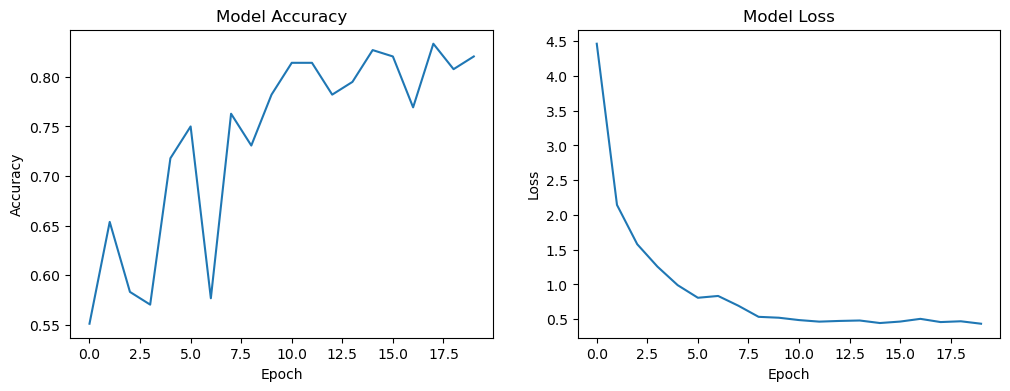

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()
#print(history.history['accuracy'])

Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(x_train,y_train)

nb_model_filename = "NB_model.pkl"

with open(nb_model_filename,"wb") as file:
  pickle.dump(nb_classifier,file)

In [48]:
y_pred = nb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.7948717948717948


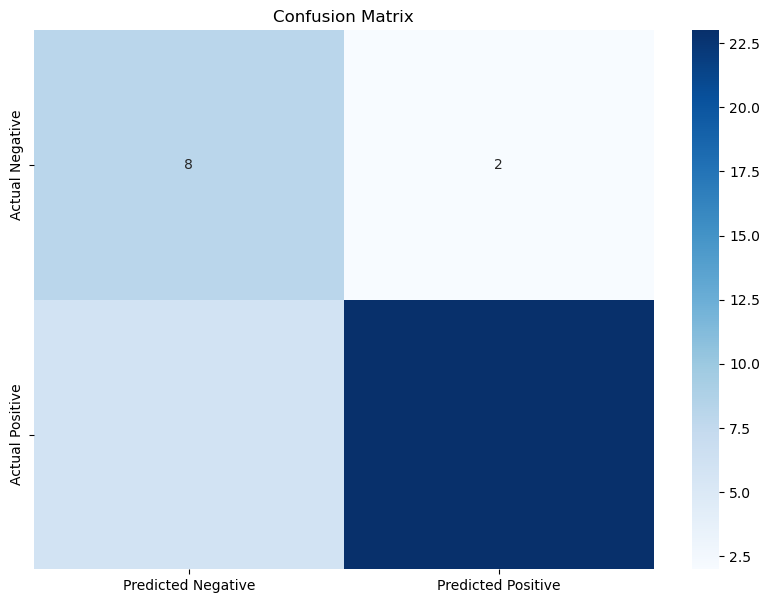

In [49]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

rf_model_filename = "RF_model.pkl"

with open(rf_model_filename,"wb") as file:
  pickle.dump(rf_classifier,file)

In [51]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


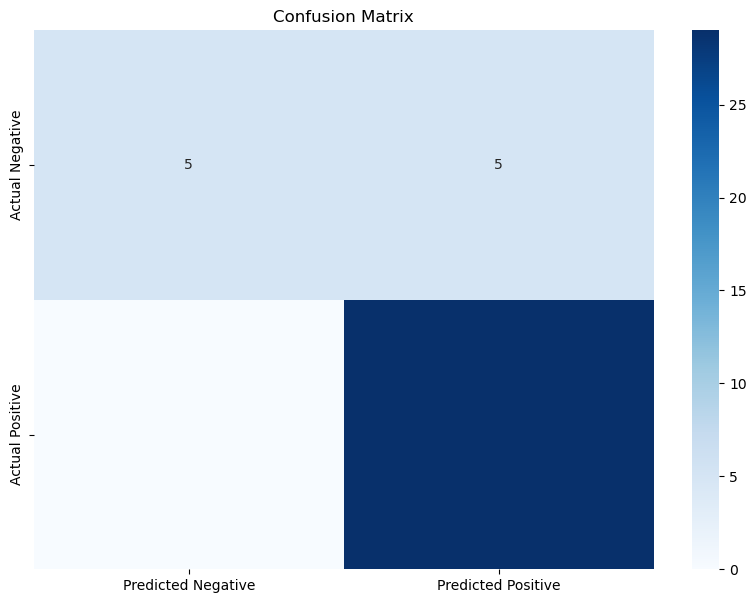

In [52]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

XGBoost

In [53]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train,y_train)

xgb_model_filename = "XG_model.pkl"

with open(xgb_model_filename,"wb") as file:
  pickle.dump(xgb_classifier,file)

In [54]:
y_pred = xgb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


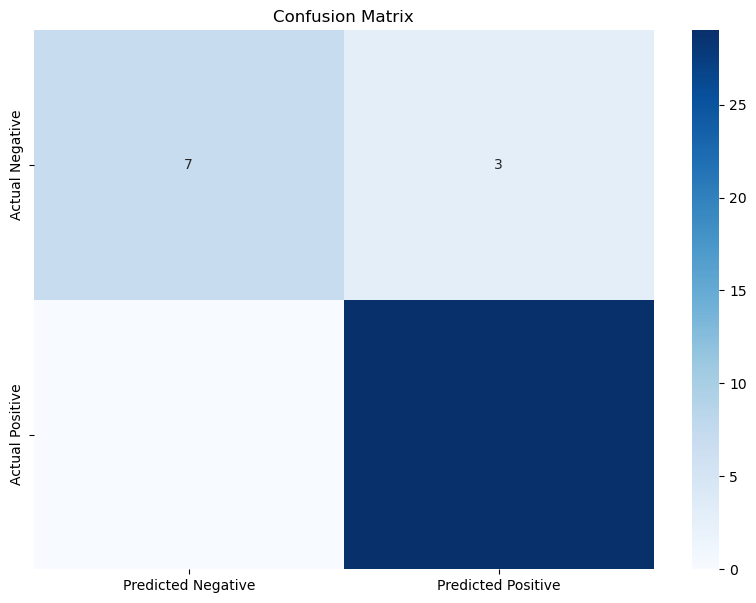

In [55]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# PCA Random Forests

In [56]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca_rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

pca_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [57]:
y_pred = pca_rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


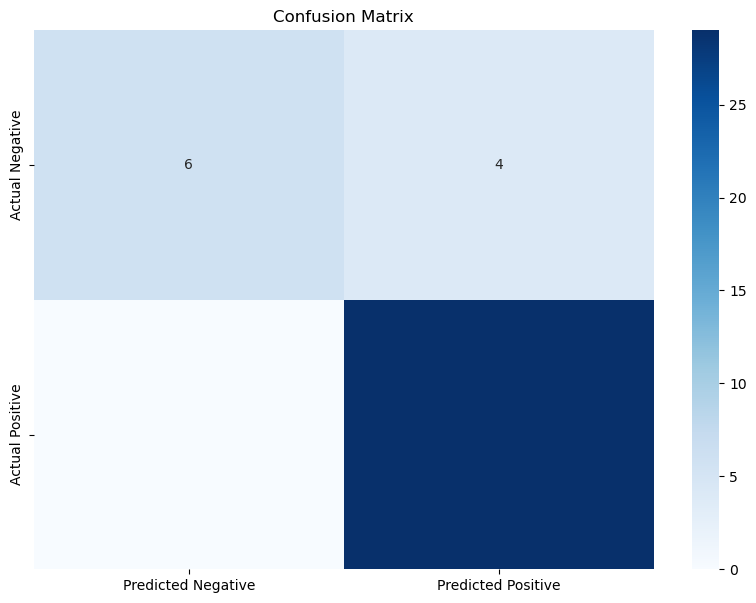

In [58]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

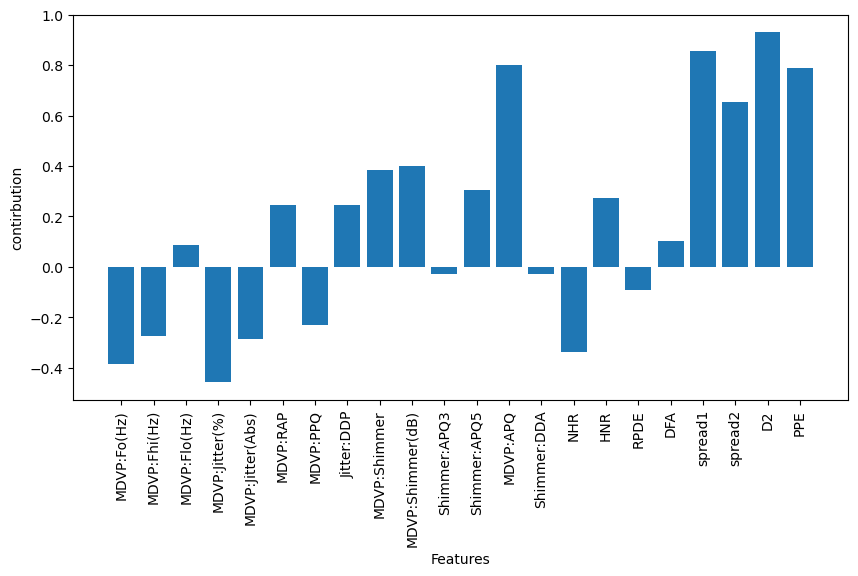

In [59]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = lr_classifier.coef_[0]

features = col

plt.figure(figsize = (10,5))
plt.xlabel("Features")
plt.ylabel("contirbution")
plt.bar(features,coefficients)
plt.xticks(rotation = 90)
plt.show()

# Accuracy , Precision , Recall And F1Score

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
x_test = sc.fit_transform(x_test)

In [62]:
# def metric_printer(classifier):
#     y_pred = classifier.predict(x_test)
#     print("Classifier: ", classifier.__class__.__name__)
#     print("accuracy:" ,accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(y_test, y_pred))
#     print("Recall: ", recall_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred))
#     print('____________________________________')


In [63]:
import matplotlib.pyplot as plt

results = {}

def metric_printer(classifier):
    y_pred = classifier.predict(x_test)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall: ", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}




In [64]:
metric_printer(lr_classifier)
metric_printer(nb_classifier)
metric_printer(svm_classifier)
metric_printer(dt_classifier)
metric_printer(abc_classifier)
metric_printer(rf_classifier)
metric_printer(knn_classifier)
metric_printer(bc_classifier)
metric_printer(lgbm_classifier)
metric_printer(xgb_classifier)

Classifier:  LogisticRegression
Accuracy:  0.7948717948717948
Precision:  0.8620689655172413
Recall:  0.8620689655172413
F1 Score:  0.8620689655172413
____________________________________
Classifier:  GaussianNB
Accuracy:  0.7948717948717948
Precision:  0.92
Recall:  0.7931034482758621
F1 Score:  0.8518518518518519
____________________________________
Classifier:  SVC
Accuracy:  0.8205128205128205
Precision:  0.84375
Recall:  0.9310344827586207
F1 Score:  0.8852459016393442
____________________________________
Classifier:  DecisionTreeClassifier
Accuracy:  0.8461538461538461
Precision:  0.8709677419354839
Recall:  0.9310344827586207
F1 Score:  0.9
____________________________________
Classifier:  AdaBoostClassifier
Accuracy:  0.8717948717948718
Precision:  0.875
Recall:  0.9655172413793104
F1 Score:  0.9180327868852459
____________________________________
Classifier:  RandomForestClassifier
Accuracy:  0.8717948717948718
Precision:  0.8529411764705882
Recall:  1.0
F1 Score:  0.920634920

NameError: name 'lgbm_classifier' is not defined

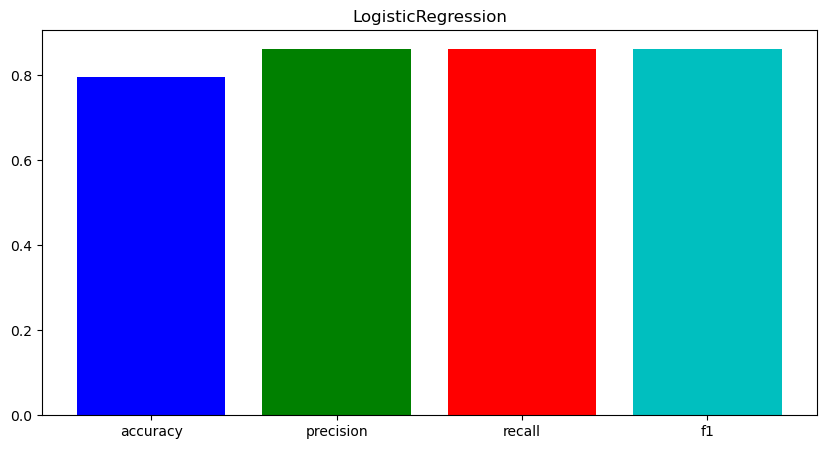

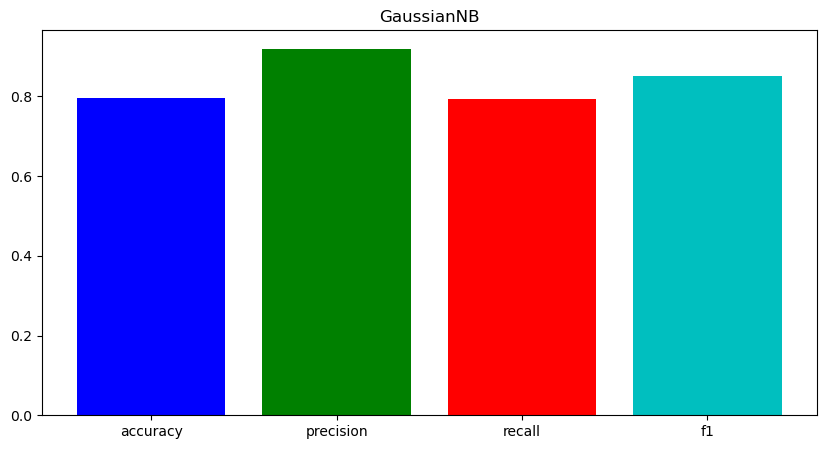

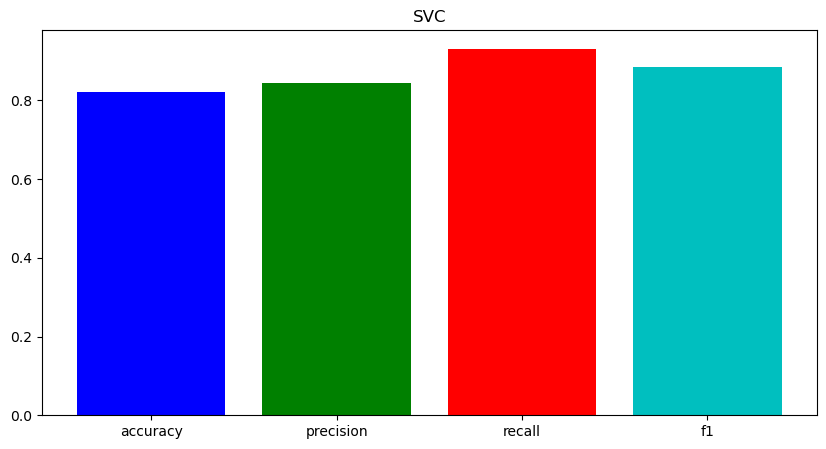

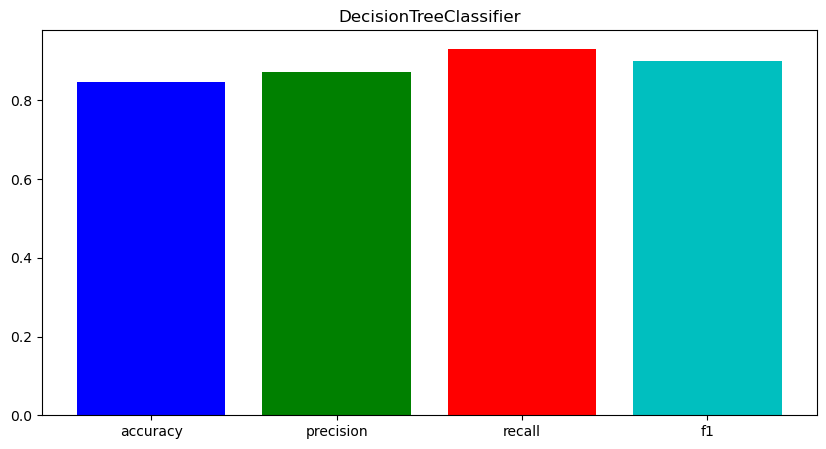

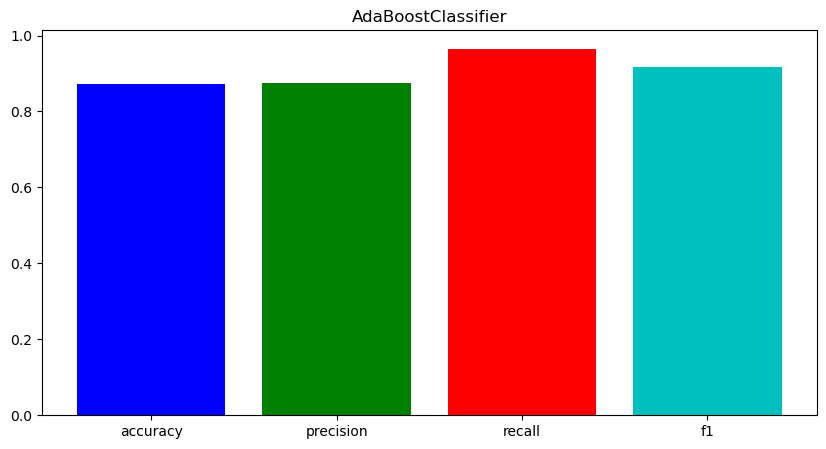

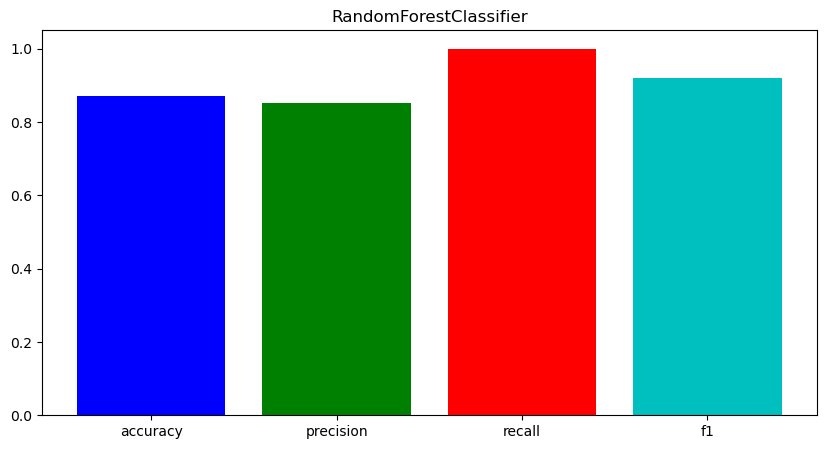

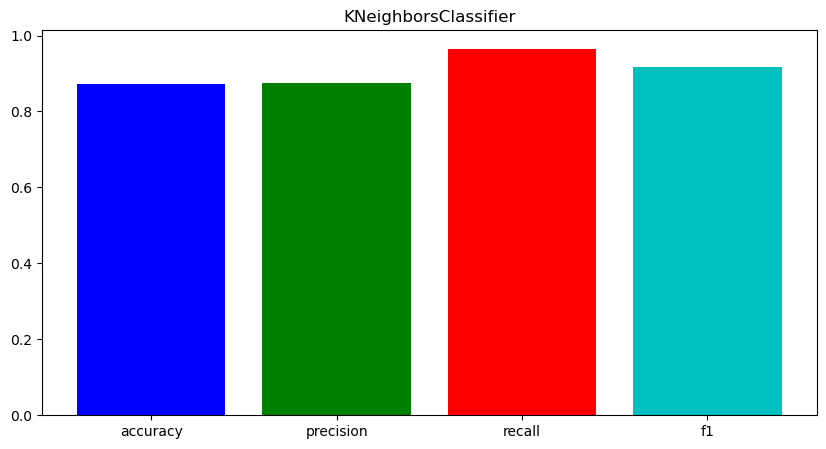

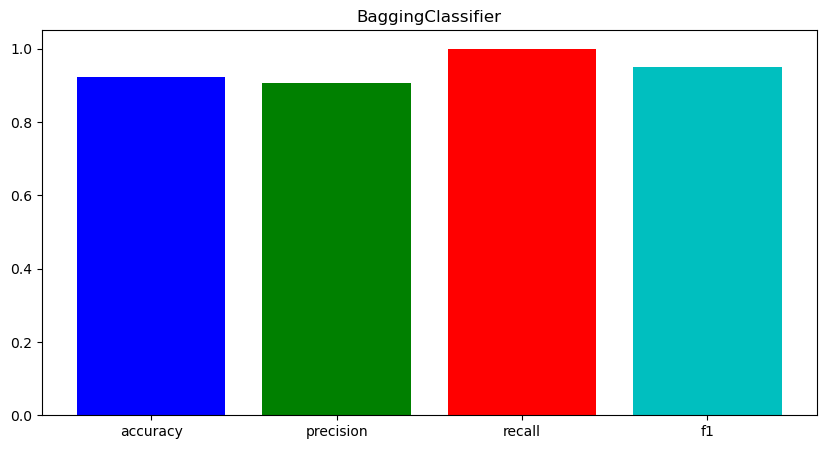

In [65]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

# **Comparision Of Accuracy Of Different Classifiers** 

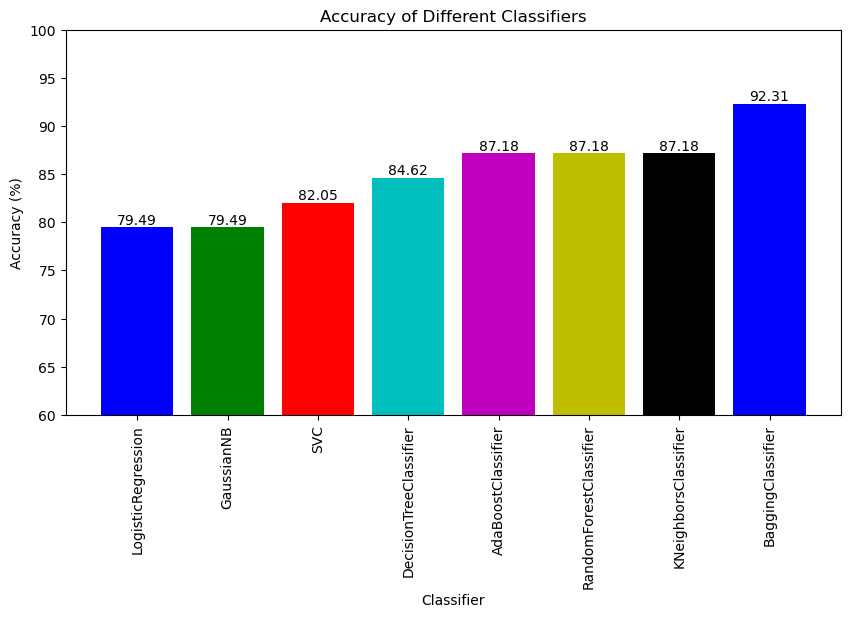

In [66]:
def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = [name for name in results.keys()]
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers ')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval,va='bottom',ha='center')

    plt.show()

plot_results(results)
